In [1]:
# Standards
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# API
import requests

# Automating
import time
import datetime
import warnings
import sys

# Preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Collect Data

In [6]:
def get_posts(subreddit, n_iter, epoch_right_now): # subreddit name and number of times function should run
    # store base url variable
    base_url = 'https://api.pushshift.io/reddit/search/submission/?subreddit='

    # instantiate empty list    
    df_list = []
    
    # save current epoch, used to iterate in reverse through time
    current_time = epoch_right_now
    
    # set up for loop
    for post in range(n_iter):
        
        # instantiate get request
        res = requests.get(
            
            # requests.get takes base_url and params
            base_url,
            
            # parameters for get request
            params = {
                
                # specify subreddit
                'subreddit' : subreddit,
                
                # specify number of posts to pull
                'size' : 100,
                
                # ???
                'lang' : True,
                
                # pull everything from current time backward
                'before' : current_time }
        )
        
        # take data from most recent request, store as df
        df = pd.DataFrame(res.json()['data'])
        
        # pull specific columns from dataframe for analysis
        df = df.loc[:, ['title',
                        'created_utc', 
                        'selftext',
                        'subreddit',
                        'author',
                        'media_only',
                        'permalink']]
        
        # append to empty dataframe list
        df_list.append(df)
        
        # add wait time
        time.sleep(30)
        
        # set current time counter back to last epoch in recently grabbed df
        current_time = df['created_utc'].min()

    # return one dataframe for all requests
    return pd.concat(df_list, axis=0)

# Adapated from Tim Book's Lesson Example & Sara Soueidan's Breakfast Hour Example

In [7]:
science_posts_df = get_posts(subreddit=['science'], n_iter=50, epoch_right_now=1598918400)

In [8]:
science_posts_df['selftext'].value_counts()

In [9]:
science_posts_df.head()

,title,created_utc,selftext,subreddit,author,media_only,permalink
0,Being rude and selfish does not help career pr...,1598916128,,science,HigherEdAvenger,False,/r/science/comments/ik91e0/being_rude_and_self...
1,How NASA and Chandrayaan discovered water on t...,1598911189,,science,7rillionaire,False,/r/science/comments/ik7lte/how_nasa_and_chandr...
2,Microbiome Analysis: Which Microbiome test is ...,1598911170,,science,Baron_ess,False,/r/science/comments/ik7lls/microbiome_analysis...
3,Study suggests religious belief does not confl...,1598910315,,science,CremationLily,False,/r/science/comments/ik7cfe/study_suggests_reli...
4,Space telescope using the Earth atmosphere as ...,1598910274,,science,KindlySecret8,False,/r/science/comments/ik7byl/space_telescope_usi...


In [49]:
science_posts_df.to_csv('./data/science.csv')

In [10]:
tech_posts_df = get_posts(subreddit=['technology'], n_iter=50, epoch_right_now=1598918400)

In [11]:
tech_posts_df['selftext'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  3783
[

In [12]:
tech_posts_df.head()

,title,created_utc,selftext,subreddit,author,media_only,permalink
0,Mozilla research: Browsing histories are uniqu...,1598916394,,technology,janjinx,False,/r/technology/comments/ik94cu/mozilla_research...
1,Will Neuralink become embedded in a future iPh...,1598915618,[removed],technology,puffingonclouds,False,/r/technology/comments/ik8wgs/will_neuralink_b...
2,"Microsoft Surface Duo Running Android Review, ...",1598915516,,technology,maxman72go,False,/r/technology/comments/ik8vbw/microsoft_surfac...
3,AI in healthcare,1598915452,[removed],technology,SeanConnery,False,/r/technology/comments/ik8unp/ai_in_healthcare/
4,Rise of Technology (The Art of Human Control),1598915286,,technology,Only_Statistician_30,False,/r/technology/comments/ik8t3c/rise_of_technolo...


In [50]:
tech_posts_df.to_csv('./data/tech.csv')

In [13]:
all_posts = pd.concat([science_posts_df, tech_posts_df])

In [ ]:
all_posts.to_csv('./data/all.csv')

In [2]:
all_posts = pd.read_csv('./data/all.csv', index_col=[0], keep_default_na=False)

In [4]:
# not much in 'selftext'
all_posts.head()

,title,created_utc,selftext,subreddit,author,media_only,permalink
0,Being rude and selfish does not help career pr...,1598916128,,science,HigherEdAvenger,False,/r/science/comments/ik91e0/being_rude_and_self...
1,How NASA and Chandrayaan discovered water on t...,1598911189,,science,7rillionaire,False,/r/science/comments/ik7lte/how_nasa_and_chandr...
2,Microbiome Analysis: Which Microbiome test is ...,1598911170,,science,Baron_ess,False,/r/science/comments/ik7lls/microbiome_analysis...
3,Study suggests religious belief does not confl...,1598910315,,science,CremationLily,False,/r/science/comments/ik7cfe/study_suggests_reli...
4,Space telescope using the Earth atmosphere as ...,1598910274,,science,KindlySecret8,False,/r/science/comments/ik7byl/space_telescope_usi...


In [5]:
#checking for null values
all_posts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        10000 non-null  object
 1   created_utc  10000 non-null  int64 
 2   selftext     10000 non-null  object
 3   subreddit    10000 non-null  object
 4   author       10000 non-null  object
 5   media_only   10000 non-null  bool  
 6   permalink    10000 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 556.6+ KB


In [3]:
# reading in my data again
science_posts = pd.read_csv('./data/science.csv', index_col=[0], keep_default_na=False)
tech_posts = pd.read_csv('./data/tech.csv', index_col=[0], keep_default_na=False)

In [30]:
# counting the total number of words in science subreddit post titles
science_count = 0
for i in science_posts['title']:
    for e in i.split(' '):
        science_count += 1
print(f'Total word count for science titles: {science_count}')

Total word count for science titles: 108105


In [31]:
# counting the total number of words in tech subreddit post titles
tech_count = 0
for i in tech_posts['title']:
    for e in i.split(' '):
        tech_count += 1
print(f'Total word count for tech titles: {tech_count}')

Total word count for tech titles: 54370


**Looks like science subreddit has about twice as many words as the tech subreddit post titles.**

### Preprocessing: CountVectorizer

In [32]:
modeling_posts = all_posts[['title', 'subreddit']]
modeling_posts

,title,subreddit
0,Being rude and selfish does not help career pr...,science
1,How NASA and Chandrayaan discovered water on t...,science
2,Microbiome Analysis: Which Microbiome test is ...,science
3,Study suggests religious belief does not confl...,science
4,Space telescope using the Earth atmosphere as ...,science
...,...,...
95,Everyone’s least favorite web browser will soo...,technology
96,Toshiba vende su división de portátiles a SHAR...,technology
97,Xiaomi’s 10th anniversary flagship is the Mi 1...,technology
98,Cuba is getting a crash course in internet cul...,technology


In [33]:
modeling_posts['subreddit'] = np.where(modeling_posts['subreddit'] == 'science', 1, 0)

<ipython-input-33-72c7698d1215>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeling_posts['subreddit'] = np.where(modeling_posts['subreddit'] == 'science', 1, 0)


In [34]:
X = modeling_posts.title
X

0     Being rude and selfish does not help career pr...
1     How NASA and Chandrayaan discovered water on t...
2     Microbiome Analysis: Which Microbiome test is ...
3     Study suggests religious belief does not confl...
4     Space telescope using the Earth atmosphere as ...
                            ...                        
95    Everyone’s least favorite web browser will soo...
96    Toshiba vende su división de portátiles a SHAR...
97    Xiaomi’s 10th anniversary flagship is the Mi 1...
98    Cuba is getting a crash course in internet cul...
99    How Cuba is Getting a Crash Course in Internet...
Name: title, Length: 10000, dtype: object

In [35]:
y = modeling_posts.subreddit

In [36]:
y

0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: subreddit, Length: 10000, dtype: int32

In [37]:
# Baseline accuracy; don't have to stratify 
y.value_counts(normalize=True)

1    0.5
0    0.5
Name: subreddit, dtype: float64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=151)

In [39]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words='english', ngram_range=[1, 4])

In [40]:
# Fit the vectorizer on our corpus.
X_train_cvec = cvec.fit_transform(X_train, y_train)

In [41]:
X_test_cvec = cvec.transform(X_test)

In [42]:
# Convert X_train into a DataFrame.
# We will not actually use this for modeling,
# this is just to visualize what is happening

X_train_df = pd.DataFrame(X_train_cvec.toarray(),
                          columns=cvec.get_feature_names())

In [43]:
X_train_df

,00,00 utc,00 utc post,00 utc post ama,000,000 000,000 000 experienced,000 000 experienced repeated,000 000 megabits,000 000 megabits second,...,醃肉大比拼 蠔油,醃肉大比拼 蠔油 vs,醃肉大比拼 蠔油 vs 生粉,香港傑出品牌領袖獎,香港傑出品牌領袖獎 youtube,鸡蛋炒豆腐,麻辣烫,麻辣烫 spicy,麻辣烫 spicy non,麻辣烫 spicy non spicy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
# got code from lesson 5.05-NLP-II

# get count of top-occurring words

# empty dictionary
top_words = {}

# loop through columns
for i in X_train_df.columns:
    # save sum of each column in dictionary
    top_words[i] =  X_train_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

# View most frequent words dataframe
most_freq_df = pd.DataFrame(most_freq)

In [123]:
most_freq_df.head(10)

,0,1
0,new,839
1,study,619
2,covid,520
3,19,498
4,covid 19,491
5,scientists,274
6,people,245
7,researchers,243
8,new study,229
9,research,210


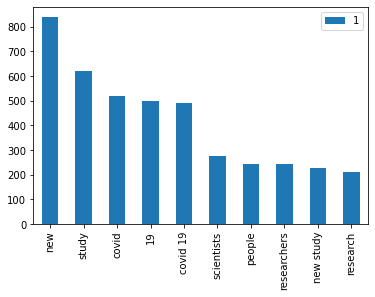

In [124]:
# got code from lesson 5.05-NLP-II
# visualize top 10 words
most_freq_df.nlargest(10, 1).plot(kind = 'bar')
plt.xticks([i for i in range(10)], [col for col in most_freq_df.nlargest(10, 1)[0]]);

### Modeling: Logistic Regression + CountVectorizer

In [17]:
log_r = LogisticRegression()

In [18]:
log_r.fit(X_train_cvec, y_train)

LogisticRegression()

In [19]:
log_r.score(X_test_cvec, y_test)

0.8908

In [20]:
log_r.score(X_train_cvec, y_train)

0.9916

In [ ]:
log_coef_cvec_df = pd.DataFrame(data = log_r_tvec.coef_, columns=tvec.get_feature_names()).T
log_coef_cvec_df.nlargest(10, 0)

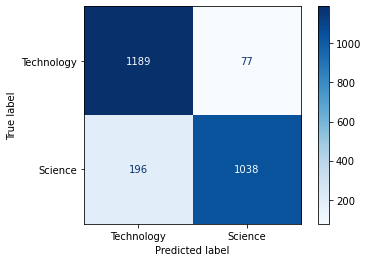

In [60]:
plot_confusion_matrix(log_r, X_test_cvec, y_test, cmap='Blues', values_format='d', display_labels=['Technology', 'Science']);

### Preprocessing: TfidfVectorizer

In [46]:
tvec =TfidfVectorizer(stop_words='english')

In [47]:
X_train_tvec = tvec.fit_transform(X_train)

In [48]:
X_test_tvec = tvec.transform(X_test)

In [128]:
df = pd.DataFrame(X_train_tvec.toarray(),
                  columns=tvec.get_feature_names())
df.head()

,00,000,0001,000gbps,000kms,000mb,000s,000x,002a,004,...,糖醋带鱼,糯米烧麦,芝麻紫菜,芹菜腐竹沙拉,蚝油捞面,蠔油,醃肉大比拼,香港傑出品牌領袖獎,鸡蛋炒豆腐,麻辣烫
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
# got code from lesson 5.05-NLP-II

# get count of top-occurring words

# empty dictionary
top_words2 = {}

# loop through columns
for i in df.columns:
    # save sum of each column in dictionary
    top_words2[i] =  df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq1 = pd.DataFrame(sorted(top_words2.items(), key = lambda x: x[1], reverse = True))

# View most frequent words dataframe
most_freq_df1 = pd.DataFrame(most_freq1)


most_freq_df1.head(10)

,0,1
0,new,104.578218
1,covid,78.752342
2,study,76.764898
3,19,75.226187
4,apple,49.853385
5,scientists,47.421230
6,facebook,45.947849
7,help,44.623066
8,market,43.565004
9,google,41.038596


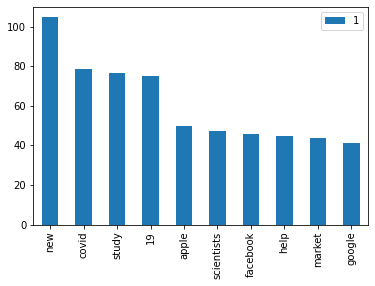

In [131]:
# got code from lesson 5.05-NLP-II
# visualize top 10 words
most_freq_df1.nlargest(10, 1).plot(kind = 'bar')
plt.xticks([i for i in range(10)], [col for col in most_freq_df1.nlargest(10, 1)[0]]);

### Modeling: Logistic Regression + TfidfVectorizer

In [49]:
log_r_tvec = LogisticRegression()

In [50]:
log_r_tvec.fit(X_train_tvec, y_train)

LogisticRegression()

In [51]:
log_r_tvec.score(X_test_tvec, y_test)

0.892

In [52]:
log_r_tvec.score(X_train_tvec, y_train)

0.9624

In [53]:
log_r_tvec.intercept_

array([-0.20517831])

In [54]:
log_coef_tvec_df = pd.DataFrame(data = log_r_tvec.coef_, columns=tvec.get_feature_names()).T
log_coef_tvec_df.nlargest(10, 0)

,0
study,6.040987
shirt,5.217851
scientists,4.256064
science,3.400663
research,3.325377
researchers,3.175978
covid,3.050223
19,2.669785
earth,2.587976
brain,2.522192


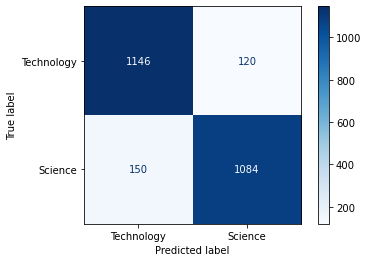

In [136]:
plot_confusion_matrix(log_r_tvec, X_test_tvec, y_test, cmap='Blues', values_format='d', display_labels=['Technology', 'Science']);

**TF-IDF had 3 less erros than the CountVectorizer when the data was put through a basic Logistic Regression model with 89.2% accuracy. It was also less overfit than when using the CountVectorizer to preprocess the data.**

### Modeling: Naive Bayes + Count Vectorizer

In [43]:
nbayes_cvec = MultinomialNB()

In [44]:
nbayes_cvec.fit(X_train_cvec, y_train)

MultinomialNB()

In [45]:
nbayes_cvec.score(X_train_cvec, y_train)

0.9898666666666667

In [46]:
nbayes_cvec.score(X_test_cvec, y_test)

0.8876

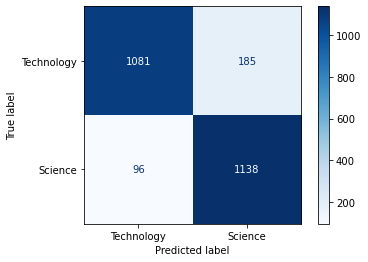

In [58]:
plot_confusion_matrix(nbayes_cvec, X_test_cvec, y_test, cmap='Blues', values_format='d', display_labels=['Technology', 'Science']);

### Modeling: Naive Bayes + TfidfVectorizer

In [53]:
nbayes_tvec = MultinomialNB()

In [54]:
nbayes_tvec.fit(X_train_tvec, y_train)

MultinomialNB()

In [55]:
nbayes_tvec.score(X_train_tvec, y_train)

0.9581333333333333

In [56]:
nbayes_tvec.score(X_test_tvec, y_test)

0.8936

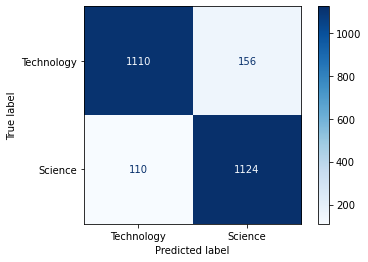

In [57]:
plot_confusion_matrix(nbayes_tvec, X_test_tvec, y_test, cmap='Blues', values_format='d', display_labels=['Technology', 'Science']);